In [1]:
import os

In [131]:
import fitsio
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import numpy as np
from PIL import Image, ImageOps, ImageChops

In [3]:
Y6A1_COADD_DIR = "/pscratch/sd/s/smau/Y6A1_COADD"
Y6A1_COADD_FIDUCIAL_DIR = "/pscratch/sd/s/smau/Y6A1_COADD_fiducial"
MASK_DIR = "/pscratch/sd/s/smau/fiducial_masks"

In [4]:
# SIZE = (1000, 1000)
SIZE = (256, 256)
EXTENT = (0, 10_000, 0, 10_000)

In [5]:
# with open("args-y6.txt", "r") as fp:
#     for i, line in enumerate(fp):
#         if i < 525:
#             tilename = line.split(" ")[0]
#         else:
#             break

In [6]:
tilename = "DES0528-2041"

In [7]:
_real_image = os.path.join(
    Y6A1_COADD_DIR,
    f"{tilename}-gri.jpg",
)

In [8]:
_sim_image = os.path.join(
    Y6A1_COADD_FIDUCIAL_DIR,
    f"{tilename}-coadd-gri.jpg",
)

In [9]:
_mask = os.path.join(
    MASK_DIR,
    f"{tilename}_metadetect-config_mdetcat_part0000-mask.fits.fz",
)

In [10]:
with (
    Image.open(_real_image) as real_image,
    Image.open(_sim_image) as sim_image
):
    real_image.thumbnail(SIZE)
    sim_image.thumbnail(SIZE)

with fitsio.FITS(_mask) as fits:
    mask = fits[1].read()

# bitmask = (mask > 1)
# with Image.fromarray(bitmask) as im:
#     im = PIL.ImageOps.flip(im)
#     im = im.convert("L")
#     im = PIL.ImageOps.invert(im)
#     im.thumbnail(SIZE)

/pscratch/sd/s/smau/conda/des-y6-dev/lib/python3.11/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [11]:
# mask &= (~2**4)

In [106]:
with Image.fromarray((mask & (~2**2)) != 1) as _im_all:
    _im_all = ImageOps.invert(_im_all)
    # im_all = im_all.convert("L")
    _im_all = ImageOps.flip(_im_all)
    _im_all.thumbnail(SIZE)

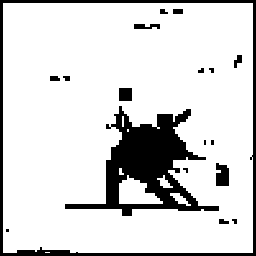

In [107]:
_im_all

In [108]:
# im_all.putalpha(255)

In [109]:
with Image.fromarray(~(mask & (2**2) == 0)) as _im_gaia:
    _im_gaia = ImageOps.invert(_im_gaia)
    # im_gaia = im_gaia.convert("L")
    _im_gaia = ImageOps.flip(_im_gaia)
    _im_gaia.thumbnail(SIZE)

In [110]:
with Image.fromarray(~(mask & (2**2) == 0)) as im_alpha:
    # im_alpha = ImageOps.invert(im_alpha)
    # im_alpha = im_alpha.convert("L")
    im_alpha = ImageOps.flip(im_alpha)
    im_alpha.thumbnail(SIZE)

In [111]:
im_all.getextrema(), im_gaia.getextrema(), im_alpha.getextrema()

(((0, 255), (127, 127)), ((0, 255), (0, 255)), (0, 255))

In [112]:
im_all = _im_all.convert("LA")
im_gaia = _im_gaia.convert("LA")
im_all.putalpha(255 // 2)
im_gaia.putalpha(im_alpha)

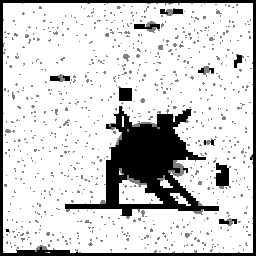

In [113]:
Image.alpha_composite(
    im_gaia.convert("RGBA"),
    im_all.convert("RGBA"),
).convert("L")

---

In [ ]:
cmap = mpl.cm.gray_r
bounds = np.unique(mask)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(7, 3))

fig.subplots_adjust(hspace=0, wspace=1/12)

axs[0].imshow(real_image, extent=EXTENT)
axs[0].set_xticks([10_000 / 3, 10_000 / 3 * 2])
axs[0].set_yticks([10_000 / 3, 10_000 / 3 * 2])
# axs[0].set_xlabel("$x_{coadd}$ [pixels]")
# axs[0].set_ylabel("$y_{coadd}$ [pixels]")
axs[0].tick_params("both", which="both", direction="out",  top=False, right=False)
# axs[0].set_title("real")

axs[1].imshow(sim_image, extent=EXTENT)
axs[1].set_xticks([10_000 / 3, 10_000 / 3 * 2])
# axs[1].set_xlabel("$x_{coadd}$ [pixels]")
# axs[1].set_ylabel("$y_{coadd}$ [pixels]")
axs[1].tick_params("both", which="both", direction="out", top=False, left=False, right=False, labelleft=False)
# axs[1].set_title("sim")

# axs[2].imshow(im, extent=EXTENT, cmap="gray")
axs[2].imshow(mask, extent=EXTENT, origin="lower", cmap=cmap, norm=norm)
# axs[2].imshow(mask & (~2**2), extent=EXTENT, origin="lower")
# axs[2].imshow(mask & 2**2, extent=EXTENT, origin="lower", cmap="Reds", alpha=0.5)
# axs[2].set_xlabel("$x_{coadd}$ [pixels]")
# axs[2].set_ylabel("$y_{coadd}$ [pixels]")
axs[2].tick_params("both", which="both", direction="out", top=False, left=False, right=False, labelleft=False)
axs[2].set_xticks([10_000 / 3, 10_000 / 3 * 2])
# axs[2].set_title("mask")

fig.supxlabel("$x_{coadd}$ [pixels]")
fig.supylabel("$y_{coadd}$ [pixels]")
fig.suptitle(tilename)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    ax=axs[-1],
)

plt.show()

In [ ]:
np.unique(mask)

In [ ]:
cmap2 = mpl.colors.ListedColormap(["gray"])
# cmap2 = mpl.cm.Reds
cmap2.set_bad(alpha=0)
bounds2 = np.unique(mask & 2**2)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

In [ ]:
# Zm = np.ma.masked_where(mask & (~2**2), mask & 2**2)
Zm = np.ma.masked_where(mask & 2**2 == 0 , mask & 2**2)

In [ ]:
fig, axs = plt.subplots(1, 1)
axs.imshow(Zm, cmap=cmap2, norm=norm2)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap2, norm=norm2),
    ax=axs,
)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1)
axs.imshow(mask, extent=EXTENT, cmap=cmap, norm=norm)
axs.imshow(Zm, extent=EXTENT, cmap=cmap2, norm=norm2, alpha=0.5)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    ax=axs,
)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1)
axs.imshow((mask & (~2**2)) > 1, extent=EXTENT)
axs.imshow(Zm, extent=EXTENT, cmap=cmap2, norm=norm2, alpha=0.5)

plt.show()

In [ ]:
1000 * 0.263 / 60 / 60

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(7, 3), sharex=True, sharey=True)

fig.subplots_adjust(hspace=0, wspace=1/12)

axs[0].imshow(real_image, extent=EXTENT)
axs[0].set_xticks([])
axs[0].set_yticks([])
# axs[0].set_xticks([10_000 / 3, 10_000 / 3 * 2])
# axs[0].set_yticks([10_000 / 3, 10_000 / 3 * 2])
# axs[0].set_xlabel("$x_{coadd}$ [pixels]")
# axs[0].set_ylabel("$y_{coadd}$ [pixels]")
# axs[0].tick_params("both", which="both", direction="out",  top=False, right=False)
# axs[0].set_title("real")
# axs[0].plot([100,  1100], [9900, 9900], c="w")
_n = 1000
scalebar = AnchoredSizeBar(
    axs[0].transData,
    _n, f"{_n} pixels\n{_n * 0.263 / 60 / 60:.2f} deg", "upper left", 
    color="white",
    frameon=False,
    size_vertical=1,
)

axs[0].add_artist(scalebar)

axs[1].imshow(sim_image, extent=EXTENT)
# axs[1].set_xlabel("$x_{coadd}$ [pixels]")
# axs[1].set_ylabel("$y_{coadd}$ [pixels]")
# axs[1].tick_params("both", which="both", direction="out", top=False, left=False, right=False, labelleft=False)
# axs[1].set_title("sim")

# axs[2].imshow(im, extent=EXTENT, cmap="gray")
axs[2].imshow((mask & (~2**2)) > 1, origin="lower")
axs[2].imshow(Zm, extent=EXTENT, origin="lower", cmap=cmap2, norm=norm2, alpha=0.5)
# axs[2].imshow(mask & (~2**2), extent=EXTENT, origin="lower")
# axs[2].imshow(mask & 2**2, extent=EXTENT, origin="lower", cmap="Reds", alpha=0.5)
# axs[2].set_xlabel("$x_{coadd}$ [pixels]")
# axs[2].set_ylabel("$y_{coadd}$ [pixels]")
# axs[2].tick_params("both", which="both", direction="out", top=False, left=False, right=False, labelleft=False)
# axs[2].set_title("mask")

# fig.supxlabel("$x_{coadd}$ [pixels]")
# fig.supylabel("$y_{coadd}$ [pixels]")
fig.suptitle(tilename)

plt.show()